In [65]:
from dateutil.parser import *
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## About the data

A good email marketing strategy is critical for every online retailer. To give you some perspective, 20% of online sales were driven by email in Q4 2015.

The problem is that most online retailers plan their email strategy without ever understanding what other companies are doing and what the underlying trends are. Let's explore the data collected by [MailCharts](https://www.mailcharts.com) to understand what the current email trends are.

The data we're about to explore was collected from January 1st, 2016 until December 31st, 2016. Before going any further, let's load our data...

In [48]:
# Since the data is over 100MB, it can't be uploaded to GitHub.
# Download the data from here: https://cl.ly/2Q0F3I2s1r0Y and save it in the data folder.
df = pd.read_csv('./data/mc-2016.csv')

In [49]:
print("Our dataset contains {} data points.".format(len(df)))
print("The columns available are: {} \n".format(list(df)))

print("Here's the format of our data:")
print(df.ix[0,:])

Our dataset contains 573198 data points.
The columns available are: ['company_id', 'guid', 'subject', 'from', 'reply_to', 'mobile_optimized', 'sent_at', 'animated', 'body_bytes', 'image_bytes'] 

Here's the format of our data:
company_id                                                        578
guid                             8564454b-f39e-c1bf-45b1-5166bf8bdb10
subject                                               My M&M's & More
from                [{"address":"noreply@r.groupon.com","name":"Gr...
reply_to                                                          NaN
mobile_optimized                                                    t
sent_at                                           2016-06-12 20:17:25
animated                                                            f
body_bytes                                                      53936
image_bytes                                                    175079
Name: 0, dtype: object


There's three question we want to answer and all of them are time-based (i.e. what's the trend).

1. Are companies dropping the notion of a `no-reply` email address?
1. Are more emails becoming mobile optimized?
1. Are GIFs more popular in emails?

In [94]:
# Let's parse the dates
# df['parsed_date'] = df.ix[0:10,'sent_at'].map(lambda x: parse(x).strftime('%B %Y'))
# df['parsed_date'] = df['sent_at'].map(lambda x: parse(x).strftime('%B %Y'))
# => That worked well for 10 examples, but for 500k rows it won't do. It's too slow!
# => Let's try another approach

df['month'] = df['sent_at'].map(lambda x: x.split('-')[1])
# print(df['month'])

Let's look at email volume for 2016.
month
01    38801
02    37443
03    40575
04    39494
05    41034
06    41847
07    52650
08    54299
09    50600
10    52727
11    60636
12    63092
dtype: int64


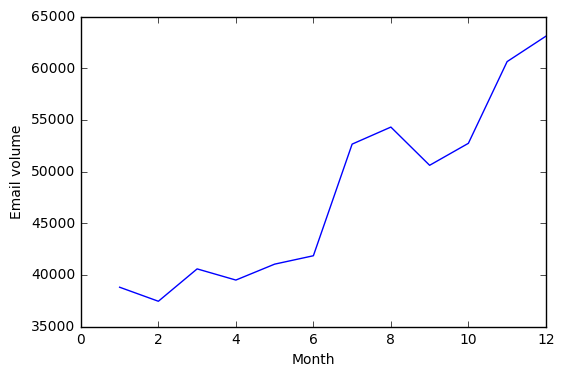

In [103]:
print("Let's look at email volume for 2016.")
monthly_volume = df.groupby(['month']).size()
print(monthly_volume)

plt.plot(monthly_volume)
plt.ylabel('Email volume')
plt.xlabel('Month')
plt.show()